
# Downloading the Mnist Data


In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 22s 2us/step


8


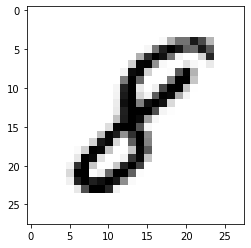

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 7777 
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [4]:
x_train.shape


(60000, 28, 28)

# Reshaping and Normalizing the Images

In [5]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


# Building the Convolutional Neural Network


In [6]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.


# Compiling and Fitting the Model


In [7]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 56s 941us/step - loss: 0.1996 - acc: 0.9412
Epoch 2/10
60000/60000 [==============================] - 55s 916us/step - loss: 0.0804 - acc: 0.9755
Epoch 3/10
60000/60000 [==============================] - 56s 928us/step - loss: 0.0567 - acc: 0.9821
Epoch 4/10
60000/60000 [==============================] - 58s 974us/step - loss: 0.0439 - acc: 0.9862
Epoch 5/10
60000/60000 [==============================] - 56s 930us/step - loss: 0.0362 - acc: 0.9884
Epoch 6/10
60000/60000 [==============================] - 55s 921us/step - loss: 0.0290 - acc: 0.99040s - loss: 0.0289 - acc: 
Epoch 7/10
60000/60000 [==============================] - 55s 920us/step - loss: 0.0270 - acc: 0.9907
Epoch 8/10
60000/60000 [==============================] - 56s 934us/step - loss: 0.0217 - acc: 0.9928
Epoch 9/10
60000/60000 [==============================] - 56s 926us/step - loss: 0.0191 - acc: 0.9936
Epoch 10/10
60000/60000 [==============================] 

# Evaluating the Model


In [8]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 325us/step


[0.06380196330521685, 0.9847]